### Датасет: TED Talks

### Описание:

Данные обо всех аудио-видео записях выступлений TED, загруженный на официальный сайт ted.com до 21 сентября 2017 года. Основной набор данных содержит информацию обо всех выступлениях, включая количество просмотров, количество комментариев, описания, имена докладчиков и заголовки. 

Датасет содержит 2550 строки и следующие столбцы:


* __Age__   – возраст, когда пациенту был поставлен диагноз.

* __Сomments__ - количество комментариев, сделанных во время выступления

* __Description__ - описание выступления

* __Duration__ - продолжительность видео в секундах

* __Event__ - место проведения выступления

* __Film_date__ - продолжительность съемки в unix

* __Languages__ - количество доступных языков & int

* __Main_speaker__ - имя первого спикера

* __Name__ - официальное название выступления, включающее в себя имя спикера

* __Num_speaker__ - количество спикеров

* __Published_date__ - время публикации выступления в unix на ted.com

* __Ratings__ - слова, описывающие выступление

* __Related_talks__ - список рекомендуемых словарей для последующего просмотра

* __Speaker_occupation__ - специализация главного спикера

* __Tags__ - темы, ассоциируемые с темой выступления

* __Title__ - название выступления

* __Url__ - ссылка на выступление

* __Views__ - количество просмотров

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/User/Downloads/archive/ted_main.csv")
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


Получим типы данных, хранящихся в датафрейме:

In [4]:
df.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

Получим размеры датафрейма:

In [5]:
df.shape

(2550, 17)

Выясним, есть ли в датафрейме пустые значения.

In [6]:
cols = list(df.columns)
df_na = {col: list(pd.isna(df[col])).count(True) for col in cols}
df_na

{'comments': 0,
 'description': 0,
 'duration': 0,
 'event': 0,
 'film_date': 0,
 'languages': 0,
 'main_speaker': 0,
 'name': 0,
 'num_speaker': 0,
 'published_date': 0,
 'ratings': 0,
 'related_talks': 0,
 'speaker_occupation': 6,
 'tags': 0,
 'title': 0,
 'url': 0,
 'views': 0}

Посчитаем для столбца 'duration' некоторые меры центральной тенденции и разброса:

In [7]:
duration_stat = {"min": df["duration"].min(), 
            "max": df["duration"].max(), 
            "mean": df["duration"].mean(),
            "median": df["duration"].median(),
            "mode": df["duration"].mode().to_list(),
            "var": df["duration"].var(ddof=0),
            "std": df["duration"].std(ddof=0),
            "range": df["duration"].max() - df["duration"].min(),
            "interquartile_range": df["duration"].quantile(0.75) - df["duration"].quantile(0.25),
            "skew": df["duration"].skew()
            }
duration_stat

{'min': 135,
 'max': 5256,
 'mean': 826.5101960784314,
 'median': 848.0,
 'mode': [848, 1099],
 'var': 139827.97930780525,
 'std': 373.9357957026918,
 'range': 5121,
 'interquartile_range': 469.75,
 'skew': 2.0655816331687324}

Загрузим все необходимые библиотеки

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Посмотрим какой длительности видео выпускают чаще всего. Для этого разобьем их на интервалы по 5 минут:

In [9]:
df['duration_int'] = df.duration.apply(lambda item: (item//300*5, item//300*5+5)) 

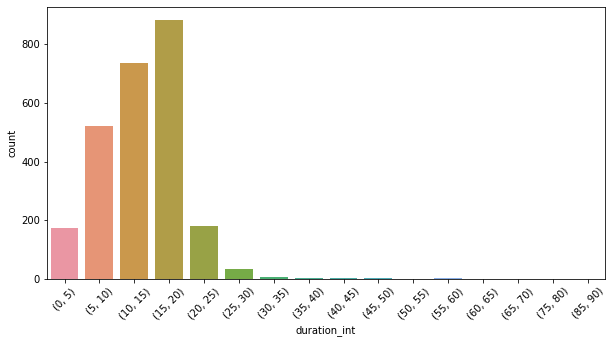

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(df['duration_int'].sort_values())
plt.xticks(rotation=45)
plt.show()

Получаем, что чаще всего выпускают видео длиной от 15 до 20 минут. 

Теперь посмотрим какой продожительности видео смотрят чаще всего. Для этого найдем среднее значение по каждому интервалу времени:

In [11]:
views_duration_sum = df.groupby('duration_int').sum()['views']

In [12]:
from scipy import stats
views_duration_int = df.groupby('duration_int').agg(lambda x: np.mean(x))['views'].reset_index()

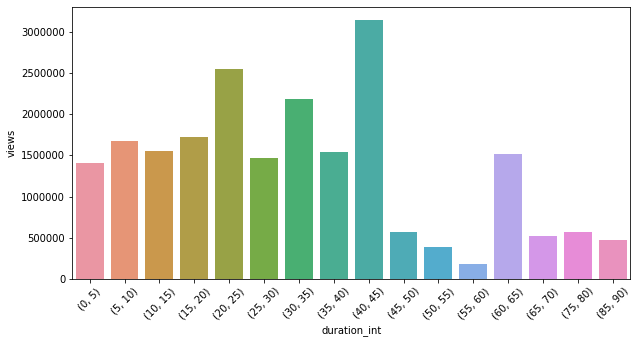

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(views_duration_int.duration_int, views_duration_int.views)
plt.xticks(rotation=45)
plt.show()

Видим, что популярнее всего видео длиной от 40 до 45 минут

Посмотрим на соотношение количества спикеров

In [14]:
df['num_speaker'].nunique()

5

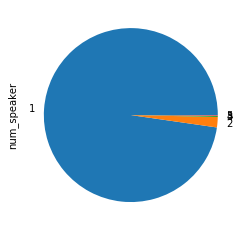

In [15]:
df['num_speaker'].value_counts().plot(kind='pie')
plt.show()

Видим, что подавляющее большинство - это одиночные спикеры. Рассмотрим лучше соотношение меньшей доли на гистограмме

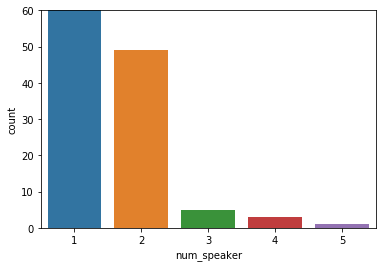

In [16]:
plt.ylim(0, 60)
sns.countplot(df['num_speaker'])
plt.show()

Посмотрим на зависимость количества просмотров от количества доступных языков 

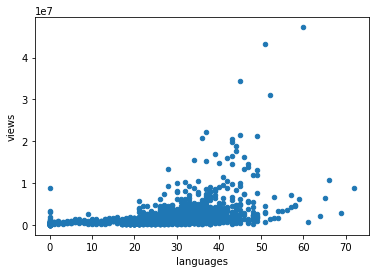

In [17]:
df.plot(x="languages", y="views", kind = 'scatter')
plt.show()

Определим соотношение мужчин и женщин среди спикеров. Для в отдельном столбце 'speaker_sex' определим пол каждого спикера:

In [18]:
from gender_guesser import detector
d = detector.Detector()

In [19]:
d.get_gender('Al')

'male'

In [20]:
df["speaker_sex"] = df.main_speaker.str.split().str[0].apply(d.get_gender)

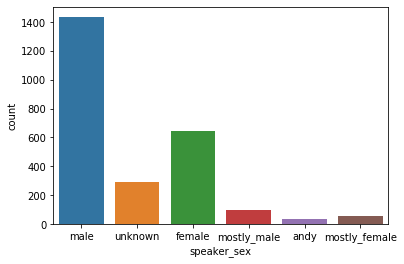

In [21]:
sns.countplot(df['speaker_sex'])
plt.show()

Мужчин спикеров почти в два раза больше, чем женщин

Посмотрим кого смотрят чаще:

In [22]:
speaker_sex_meanviews = df.groupby('speaker_sex').agg(lambda x: np.mean(x))['views'].reset_index()

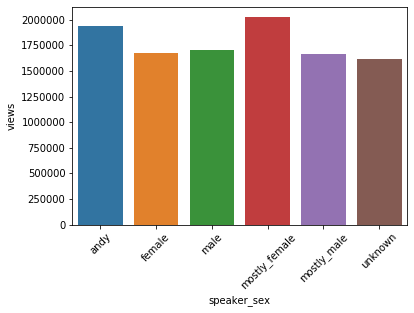

In [23]:
sns.barplot(speaker_sex_meanviews.speaker_sex, speaker_sex_meanviews.views)
plt.xticks(rotation=45)
plt.show()

Если учитывать категории 'mostly_female' и 'mostly_male', то женщин смотрят чаще

Посмотрим теперь на соотношение количества выпущенных видео по годам. Для этого из столбца 'published_date' определим год выпуска видео

In [24]:
from datetime import datetime
df['published_date'] = df.published_date.apply(lambda item: datetime.utcfromtimestamp(item).strftime('%Y-%m-%d %H:%M:%S'))    

In [25]:
df['published_date'] = pd.to_datetime(df['published_date'])

In [26]:
df['published_date_year'] = df.published_date.apply(lambda item: item.year) 

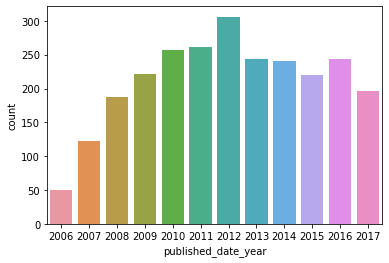

In [27]:
sns.countplot(df['published_date_year'])
plt.show()

Наиболее плодотворным на количество выпускаемых видео был 2012 год

Теперь посмотрим видео каких годов имеет больше всего просмотров. Для этого просуммируем количество просмотров для каждого года:

In [28]:
views_year = df.groupby('published_date_year').sum()['views']

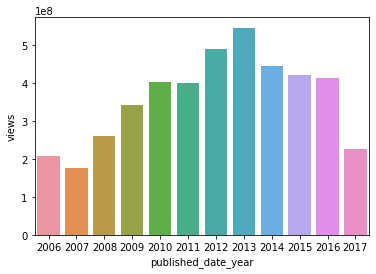

In [46]:
sns.barplot(views_year.index, views_year.values).set(ylabel='views')
plt.show()

Видим, что в сумме просмотров больше в 2013 году. Но если взять среднее значение вместо суммы, то получим следующее:

In [30]:
views_year_mean = df.groupby('published_date_year').agg(lambda x: np.mean(x))['views'].reset_index()

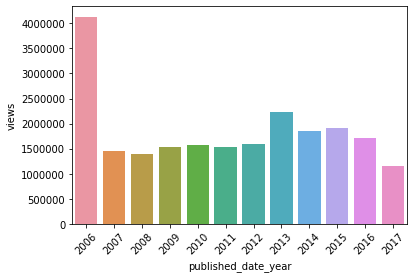

In [31]:
sns.barplot(views_year_mean.published_date_year, views_year_mean.views)
plt.xticks(rotation=45)
plt.show()

В 2006 году выпустились видео с наибольшим средним числом просмотров

Проверим зависимость количества просмотров от длительности. По предположению: чем дольше видео, тем меньше просмотров

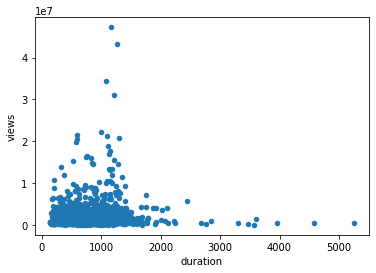

In [32]:
df.plot(x="duration", y="views", kind = 'scatter')
plt.show()

Можно считать, что гипотеза подтвердилась

Теперь посмотрим какой ивент был самым масштабным. Посмотрим сколько всего их было:

In [33]:
df['event'].nunique()

355

Отсортируем в порядке возрастания и определим количество повторений для каждого уникального значения:

In [34]:
df['event'].sort_index()

0            TED2006
1            TED2006
2            TED2006
3            TED2006
4            TED2006
            ...     
2545         TED2017
2546         TED2017
2547         TED2017
2548    TEDxMileHigh
2549         TED2017
Name: event, Length: 2550, dtype: object

In [35]:
df['event'].value_counts()[:20].index.tolist()

['TED2014',
 'TED2009',
 'TED2013',
 'TED2016',
 'TED2015',
 'TEDGlobal 2012',
 'TED2011',
 'TED2007',
 'TEDGlobal 2011',
 'TED2010',
 'TED2017',
 'TEDGlobal 2013',
 'TED2012',
 'TEDGlobal 2009',
 'TED2008',
 'TEDGlobal 2010',
 'TEDGlobal 2014',
 'TED2006',
 'TED2005',
 'TEDIndia 2009']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

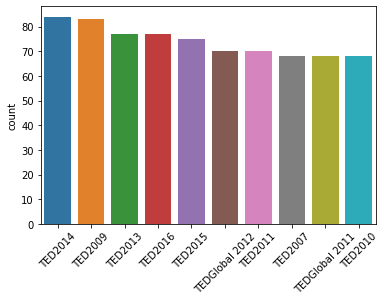

In [47]:
sns.barplot(df['event'].value_counts()[:10].index, df['event'].value_counts()[:10].values).set(ylabel='count')
plt.xticks(rotation=45)

Получаем, что больше всего видео вышло на событии TED2014 